# Pipelines

Pipelines chains together multiple steps so that the output of each step is used as input to the next step.

Pipelines makes it easy to apply the same preprocessing to train and test!

1. Without Pipeline Project

2. With Pipeline

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder,MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
df=pd.read_csv("train.csv")

In [2]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [29]:
dftest=pd.read_csv("test.csv")

In [30]:
dftest.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [31]:
dftest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [4]:
df.drop(columns=["PassengerId","Name","Ticket","Cabin"],inplace=True)

In [28]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [5]:
X_train,X_test,y_train,y_test=train_test_split(df.drop(columns=["Survived"]),df["Survived"],test_size=0.2,random_state=42)

In [6]:
X_train.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
331,1,male,45.5,0,0,28.5,S
733,2,male,23.0,0,0,13.0,S


In [7]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [8]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
import seaborn as sns

<Axes: xlabel='Age', ylabel='Density'>

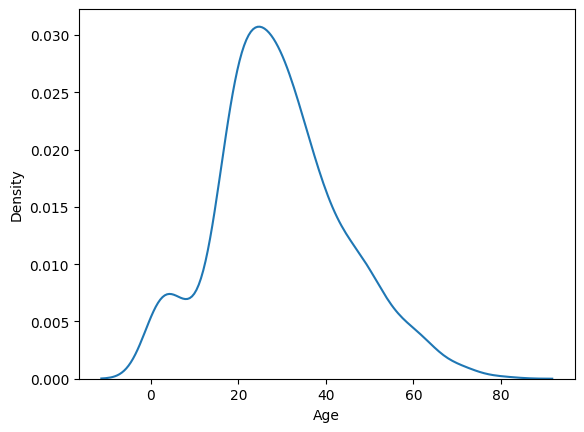

In [10]:
sns.kdeplot(df,x="Age")

In [34]:
# Applying Imputation
si_age=SimpleImputer(strategy="mean")
si_embarked=SimpleImputer(strategy="most_frequent")

X_train_age=si_age.fit_transform(X_train[["Age"]])
X_train_embarked=si_embarked.fit_transform(X_train[["Embarked"]])

In [35]:
X_test_age=si_age.transform(X_test[["Age"]])
X_test_embarked=si_embarked.transform(X_test[["Embarked"]])

In [36]:
# One Hot Encoding
ohe_sex=OneHotEncoder(sparse_output=False,handle_unknown="ignore")
ohe_embarked=OneHotEncoder(sparse_output=False,handle_unknown="ignore")

In [37]:
X_train_sex=ohe_sex.fit_transform(X_train[["Sex"]])
X_test_sex=ohe_sex.transform(X_test[["Sex"]])

In [38]:
X_train_embarked=ohe_embarked.fit_transform(X_train[["Embarked"]])
X_test_embarked=ohe_embarked.transform(X_test[["Embarked"]])

In [39]:
X_train_age

array([[45.5       ],
       [23.        ],
       [32.        ],
       [26.        ],
       [ 6.        ],
       [24.        ],
       [45.        ],
       [29.        ],
       [29.49884615],
       [29.49884615],
       [42.        ],
       [36.        ],
       [33.        ],
       [17.        ],
       [29.        ],
       [50.        ],
       [35.        ],
       [38.        ],
       [34.        ],
       [17.        ],
       [11.        ],
       [61.        ],
       [30.        ],
       [ 7.        ],
       [63.        ],
       [20.        ],
       [29.49884615],
       [29.        ],
       [36.        ],
       [29.49884615],
       [50.        ],
       [27.        ],
       [30.        ],
       [33.        ],
       [29.49884615],
       [29.49884615],
       [ 2.        ],
       [25.        ],
       [51.        ],
       [25.        ],
       [29.49884615],
       [29.49884615],
       [24.        ],
       [18.        ],
       [29.49884615],
       [25

In [40]:
X_train_sex

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [41]:
X_test_rem=X_test.drop(columns=["Sex","Age","Embarked"])
X_train_rem=X_train.drop(columns=["Sex","Age","Embarked"])


In [42]:
X_test_rem

,Pclass,SibSp,Parch,Fare
709,3,1,1,15.2458
439,2,0,0,10.5000
840,3,0,0,7.9250
720,2,0,1,33.0000
39,3,1,0,11.2417
...,...,...,...,...
433,3,0,0,7.1250
773,3,0,0,7.2250
25,3,1,5,31.3875
84,2,0,0,10.5000


In [43]:
X_train_transformed=np.concatenate((X_train_rem,X_train_age,X_train_sex,X_train_embarked),axis=1)
X_test_transformed=np.concatenate((X_test_rem,X_test_age,X_test_sex,X_test_embarked),axis=1)

In [44]:
X_test_transformed.shape

(179, 11)

In [45]:
X_test_transformed.shape

(179, 11)

In [46]:
clf=DecisionTreeClassifier()
clf.fit(X_train_transformed,y_train)

DecisionTreeClassifier()

In [47]:
y_pred=clf.predict(X_test_transformed)

In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.776536312849162

In [49]:
import pickle

In [50]:
#pickle.dump(ohe_sex,open("models/ohe_sex.pkl","wb"))
#pickle.dump(ohe_embarked,open("models/ohe_embarked.pkl","wb"))
#pickle.dump(clf,open("models/clf.pkl","wb"))